In [0]:
import string
from html import unescape

# helper function to keep only the content in the column
def retrieve_content(text):
  text = str(text)
  text_list = text.split()

  # finding the term that contains @
  calloutterms = [s for s in text_list if "@" in s]

  for term in calloutterms:
    text_list.remove(term)

  final_text = ' '.join(text_list)

  return unescape(final_text)



# helper function to keep the @__ part
def retrieve_target(text):
  text = str(text)
  text_list = text.split()

  # finding the term that contains @
  calloutterms = [s for s in text_list if "@" in s]
  calloutterms=str(next(iter(calloutterms), "0"))
  calloutterms=calloutterms.translate(str.maketrans('', '', string.punctuation))
  # print(calloutterms)

  return calloutterms


In [2]:

CleanText=[] # list which will contain the polarity of the comments
Company=[]
for i in customer.text:
    try:
        contenttext=retrieve_content(i)
        target=retrieve_target(i)
        CleanText.append(contenttext)
        Company.append(target)
    except:
        contenttext=retrieve_content(0)
        target=retrieve_target(0)

NameError: ignored

In [0]:
customer['CleanText']=CleanText
customer['Company']=Company

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
customer.head()

Unnamed: 0  ...  Company
141         141  ...        0
304         304  ...        0
415         415  ...        0
429         429  ...        0
503         503  ...        0

[5 rows x 9 columns]

# Generating Key Fields


In [0]:
import nltk.stem
import nltk.corpus
import nltk.tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re


from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english')) 

def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)


preprocessed=[]
for i in customer.CleanText: 
  i=remove_urls(i)
  word_tokens = word_tokenize(i)
  filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words] 
  preprocessed.append(str(filtered_sentence).translate(str.maketrans('', '', string.punctuation)))

In [0]:
customer['CleanestText']=preprocessed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Sentiment Analysis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pol=[] # list which will contain the polarity of the comments
for i in customer.CleanestText:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [0]:
customer['SentimentCont']=pol
customer['SentimentDisc']=pol

customer['SentimentDisc'][customer.SentimentCont > 0.3]= 1
customer['SentimentDisc'][customer.SentimentCont < -0.3]= -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [0]:
df_positive = customer[customer.SentimentDisc==1]

(-0.5, 999.5, 499.5, -0.5)

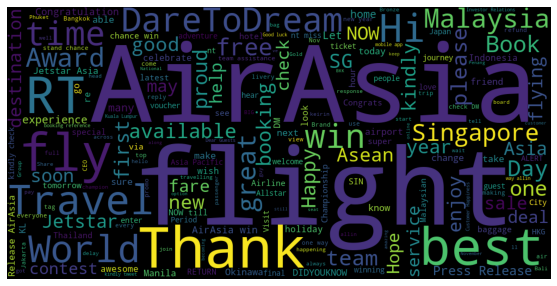

In [0]:
k= (' '.join(df_positive['CleanestText']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

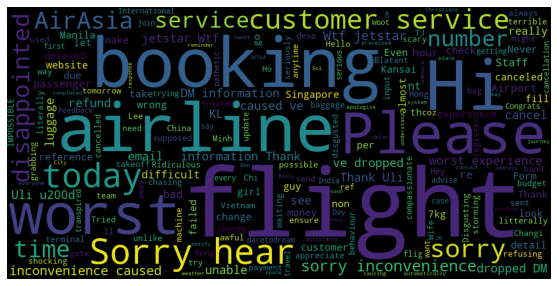

In [0]:
df_negative = customer[customer.SentimentDisc==-1]
k= (' '.join(df_negative['CleanestText']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

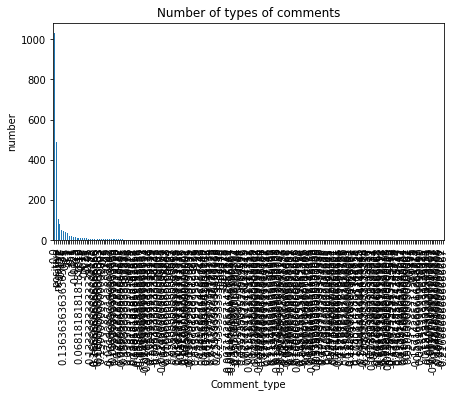

In [0]:
customer['SentimentDisc'].replace({1:'positive',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of comments');
plt.xlabel('Comment_type');
plt.ylabel('number');

In [0]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(customer.Company):
    id.append(i)
    try:
        pos_comm.append(customer[customer.Company==i].SentimentDisc.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(customer[customer.Company==i].SentimentDisc.value_counts()[-1])
    except:
        neg_comm.append(0)

In [0]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']
df_unique.sort_values(by=['total_comments'])
df_unique.head(20)

id  pos_comm  neg_comm  total_comments
0                           6         1               7
1            Oracle         0         0               0
2      faizzariffin         1         0               1
3   Derrick28852534         0         0               0
4      DeepaAthlete         1         0               1
5     SUPERADRIANME         2         0               2
6       abbyjelaine         0         0               0
7       clarissathm         0         1               1
8              effs         0         0               0
9            mymdec         0         0               0
10   nurullsyuhadaa         0         0               0
11          CEIAsia         0         0               0
12       gptnds1226         0         0               0
13     RRaj22201518         0         0               0
14      myrajasthan         0         0               0
15        danialchg         0         0               0
16    GabriellaBong         0         0               0
17       WeeWernLow         0         0               0
18       AzizLaikar         1         0               1
19       ShanksSiva         0         0               0

In [0]:
sorteddf_unique=df_unique.sort_values(by=['total_comments'],ascending=False)
sorteddf_unique.head(20)

id  pos_comm  neg_comm  total_comments
110                0       218        14             232
98       JetstarAsia        58        43             101
271          AirAsia        24        19              43
204        riadasmat         8         1               9
206   AirAsiaSupport         7         2               9
0                            6         1               7
314      AzizulAWANG         7         0               7
324         GAvS2019         5         0               5
171     MarketingEds         5         0               5
293  lloydthelostboy         5         0               5
250       airasiabig         5         0               5
344    tonyfernandes         3         1               4
295    ChangiAirport         4         0               4
134     irenemaligat         4         0               4
75          phaakell         3         1               4
212           Airbus         3         0               3
272   MineskiProTeam         3         0               3
30         PJRangers         3         0               3
281        TomRBlike         2         0               2
329         rollymnn         1         1               2

In [0]:
customer.head()

Unnamed: 0             tweet_id  ...  SentimentCont  SentimentDisc
141         141  1229948723393896453  ...       0.325000            1.0
304         304  1214455887164837890  ...       0.000000            0.0
415         415  1194551480692477952  ...       0.450000            1.0
429         429  1191930461527916545  ...       0.321591            1.0
503         503  1178580248549572608  ...       0.100000            0.1

[5 rows x 12 columns]

In [0]:
df_verynegative = customer[customer.SentimentCont<-0.8]

In [0]:
df_verypositive = customer[customer.SentimentCont>0.8]

In [0]:
df_verynegative.head(100)

Unnamed: 0             tweet_id  ...  SentimentCont  SentimentDisc
3257           57  1237713195382370305  ...      -1.000000           -1.0
3427          227  1222521688342003716  ...      -0.975000           -1.0
3428          228  1222521688342003716  ...      -0.975000           -1.0
3556          356  1200929238272167936  ...      -1.000000           -1.0
3647          447  1179870357286617088  ...      -0.833333           -1.0
3648          448  1179870357286617088  ...      -0.833333           -1.0
3682          482  1170624673735835648  ...      -1.000000           -1.0
3796          596  1144772741666488320  ...      -1.000000           -1.0
3852          652  1135042582268981248  ...      -1.000000           -1.0
3930          730  1116815285372248066  ...      -1.000000           -1.0
7412          197  1212551249758867462  ...      -1.000000           -1.0
7414          199  1211079090918158336  ...      -1.000000           -1.0
7441          226  1192707453642633217  ...      -1.000000           -1.0
7492          277  1181849055539785728  ...      -1.000000           -1.0
7623          408  1164407177286578176  ...      -1.000000           -1.0
7649          434  1158225493730062336  ...      -1.000000           -1.0
7650          435  1158186936634204161  ...      -1.000000           -1.0
10886           6  1237018756108312576  ...      -1.000000           -1.0

[18 rows x 12 columns]

(-0.5, 999.5, 499.5, -0.5)

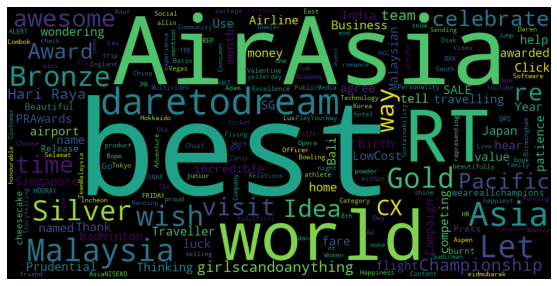

In [0]:
k= (' '.join(df_verypositive['CleanestText']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

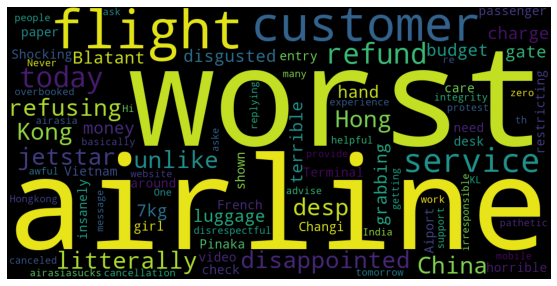

In [0]:
k= (' '.join(df_verynegative['CleanestText']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Other EDA

In [0]:
!pip install chart_studio
!pip install plotly --upgrade
#!pip install jupyterlab-plotly
!pip install jupyterlab==1.2 "ipywidgets>=7.5"

import plotly.offline as pyo
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 
from plotly.offline import init_notebook_mode, iplot 
pyo.init_notebook_mode()


import chart_studio.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
pyo.init_notebook_mode()
punc = string.punctuation

Output hidden; open in https://colab.research.google.com to view.

Unnamed: 0             tweet_id  ...  airline  complaint_category
141           141  1229948723393896453  ...  jetstar                    
304           304  1214455887164837890  ...  jetstar                    
415           415  1194551480692477952  ...  jetstar                    
429           429  1191930461527916545  ...  jetstar                    
503           503  1178580248549572608  ...  jetstar                    
...           ...                  ...  ...      ...                 ...
10890          10  1237644141632212998  ...  airasia                    
10891          11  1237592337582149632  ...                             
10892          12  1236868326141227008  ...                             
10893          13  1237182189348904961  ...                             
10895          15  1236969849785430017  ...                             

[2341 rows x 19 columns]

In [0]:
customer.groupby('Company').count()['CleanText'].sort_values(ascending=False).head(10).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of Companies', xTitle='Companies')

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

#fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
#fig.show()

In [0]:


customer['word_count'] = customer['CleanText'].apply(lambda x : len(x.split()))
customer['char_count'] = customer['CleanText'].apply(lambda x : len(x.replace(" ","")))
customer['word_density'] = customer['word_count'] / (customer['char_count'] + 1)
customer['punc_count'] = customer['CleanText'].apply(lambda x : len([a for a in x if a in punc]))

customer[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

word_count  char_count  word_density  punc_count
141          33         214      0.153488          18
304          13         100      0.128713           8
415          26         157      0.164557          12
429          23         165      0.138554          11
503          25         171      0.145349          15
516          19         124      0.152000          12
545          18          81      0.219512           4
547          54         227      0.236842           6
586          26         160      0.161491           7
587          42         202      0.206897           5

In [0]:
# function to obtain the sentiment of the headline using textblob package
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

# I have already computed the sentiments and saved the file if file is not present it will compute the sentiment in real time which could be time taking
customer['polarity'] = customer['CleanText'].apply(get_polarity)
    
customer[['polarity']].tail(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



polarity
10884  0.000000
10886 -1.000000
10887 -0.041667
10888 -0.100000
10889  0.000000
10890  0.000000
10891  0.000000
10892  0.000000
10893  0.000000
10895  0.000000

In [0]:
import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)
xwords = customer.word_count
trace1 = go.Histogram(x=xwords, opacity=0.65, name="Word Count", marker=dict(color='rgba(171, 50, 96, 0.6)'))
data1 = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Word Count of Tweets',
                   xaxis=dict(title='Word Count'),
                   yaxis=dict( title='Numer of Tweets'))
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

In [0]:

xchars = customer.char_count
trace1 = go.Histogram(x=xchars, opacity=0.65, name="Word Count", marker=dict(color='rgba(12, 50, 196, 0.6)'))
data1 = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Char Count of Tweets',
                   xaxis=dict(title='Char Count'),
                   yaxis=dict( title='Numer of Tweets'))
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

In [0]:

xwd = customer.word_density
trace1 = go.Histogram(x=xwd, opacity=0.65, name="Word Count", marker=dict(color='rgba(0, 0, 0, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Word Density of Tweets',
                   xaxis=dict(title='Word Density'),
                   yaxis=dict( title='Numer of Tweets'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [0]:

xpc = customer.punc_count
trace1 = go.Histogram(x=xpc, opacity=0.75, name="Word Count", marker=dict(color='rgba(10, 220, 150, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Punctuation Count of Tweets',
                   xaxis=dict(title='Punctuation Count'),
                   yaxis=dict( title='Numer of Tweets'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [0]:
sorteddf = customer.sort_values(by='polarity')
posdf = sorteddf.tail(50)
negdf = sorteddf.head(50)

posdf[['CleanestText']].tail(10)

CleanestText
7465   AirAsia would like extend best wish Under 13 ...
4790  Sending  TeamMalaysia junior athlete represent...
6833  Soar ✈️ great height u  Cadet Pilot recruitmen...
6841  All best FINA Diving World Series Japan  Mun Y...
4381   AirAsia awarded Best Sustainability Community...
6540   AirAsia Business Traveller Asia Pacific ’ Bes...
5380   DIDYOUKNOW The geography  Thailand incredibly...
6884  Go go We re every step way defend keirin world...
7304  Get protected  insured stand chance win iPhone...
4751  Malaysian bowler competing 2019 World Bowling ...

In [0]:
negdf[['CleanestText']].head(10)

CleanestText
7650                        worst service  Never airasia
3852   Terminal 1  Changi Aiport  around 1130 today  ...
7412                                          You worst 
7414   Having worst experience ever They basically pr...
3682                               Pinaka worst airline 
3257   litterally worst customer service ever  LITTER...
7492   One pathetic irresponsible airline India When ...
10886  re replying message  What awful customer suppo...
3796                paper shown jetstar video  Shocking 
7441   worst airline ever  integrity zero customer se...

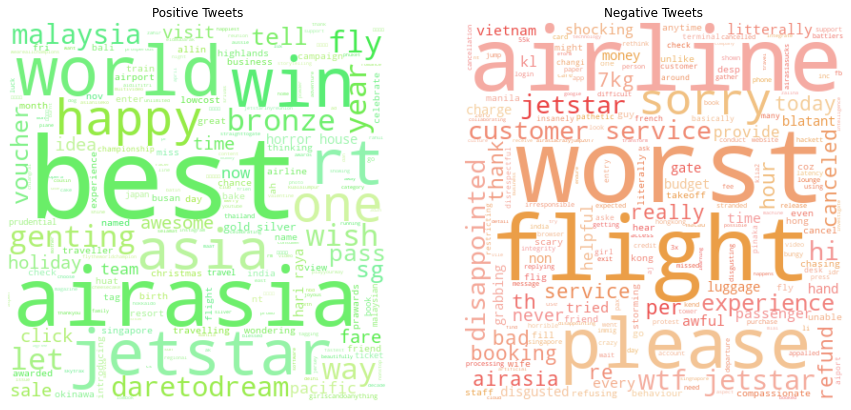

In [0]:
pos_text_cln = " ".join(posdf.CleanestText)
neg_text_cln = " ".join(negdf.CleanestText)

# replacing some most common words present in these texts
noise_words = ['brief', 'say', 'update', 'trump', 'china']
for noise in noise_words:
    pos_text_cln = pos_text_cln.lower().replace(noise," ")
    neg_text_cln = neg_text_cln.lower().replace(noise, " ")

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Positive Tweets');

wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)
ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Negative Tweets');

In [0]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

customer['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [0]:
x1 = customer.loc[customer['airline'] == 'jetstar']['polarity']
x0 = customer.loc[customer['airline'] == 'airasia']['polarity']

trace1 = go.Histogram(
    x=x0, name='Jetstar',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'AirAsia',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Recommendation')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [0]:
y0 = customer.loc[customer['airline'] == 'jetstar']['polarity']
y1 = customer.loc[customer['airline'] == 'airasia']['polarity']


trace0 = go.Box(
    y=y0,
    name = 'Jetstar',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'AirAsia',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Airline"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Airline")

# Bag of Words

In [0]:
def get_category(txt, bag):
    category = [x for x in bag if x in txt.lower()]
    if not category:
        category = [""]
    return category[0] 

airline_bag = ['airasia', 'jetstar', 'singapore airline','singapore airlines']
customer['airline'] = customer['CleanText'].apply(lambda x : get_category(x, airline_bag))

In [0]:
labels = list(customer['airline'].value_counts().index)[1:]
values = list(customer['airline'].value_counts().values)[1:]
colors = ['lightblue','gray','#eee','#999', '#9f9f']
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', 
               textinfo='value', name='tweet counts of words',
               marker=dict(colors=colors))
layout = dict(title = 'Distribution of Airline',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = [trace], layout = layout)
iplot(fig)

In [0]:
complaint_bag = ['refund', 'terrible', 'horrible', 'fired', 'worst','bad','disappointed','wtf']
customer['complaint_category'] = customer['CleanText'].apply(lambda x : get_category(x, complaint_bag))

In [0]:
labels = list(customer['complaint_category'].value_counts().index)[1:]
values = list(customer['complaint_category'].value_counts().values)[1:]
colors = ['lightblue','gray','#eee','#999', '#9f9f']
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', 
               textinfo='value', name='tweet counts of words',
               marker=dict(colors=colors))
layout = dict(title = 'Distribution of complaint tweets',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = [trace], layout = layout)
iplot(fig)

In [0]:
customer.head(10)

Unnamed: 0             tweet_id  ...  airline  complaint_category
141         141  1229948723393896453  ...  jetstar                    
304         304  1214455887164837890  ...  jetstar                    
415         415  1194551480692477952  ...  jetstar                    
429         429  1191930461527916545  ...  jetstar                    
503         503  1178580248549572608  ...  jetstar                    
516         516  1174985561465065472  ...  jetstar                    
545         545  1167573902245146624  ...                             
547         547  1167563463843074049  ...                 disappointed
586         586  1159656024321732608  ...                             
587         587  1159655983834120195  ...                 disappointed

[10 rows x 19 columns]

#Visualising by Airline

In [0]:
def prepare_text(term):
    airline_df = customer.CleanestText[customer.airline==term]
    text = " ".join(airline_df)
    noise_words = ['brief', 'say', 'update', 'ing']
    noise_words.append(term)
    for noise in noise_words:
        text = text.lower().replace(noise," ")
    return text

jetstar_text = prepare_text('jetstar')
airasia_text = prepare_text('airasia')

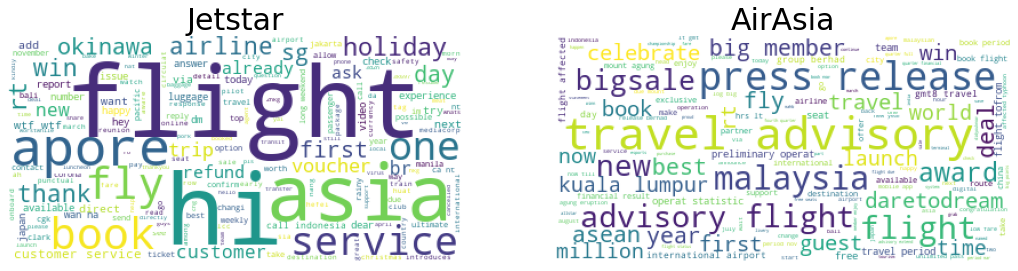

In [0]:
wordcloud1 = WordCloud(background_color='white').generate(jetstar_text)
wordcloud2 = WordCloud(background_color='white').generate(airasia_text)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

ax = axes[0]
ax.imshow(wordcloud1)
ax.axis('off');
ax.set_title("Jetstar", fontsize=30);

ax = axes[1]
ax.imshow(wordcloud2)
ax.axis('off');
ax.set_title("AirAsia", fontsize=30);



In [0]:
import nltk.stem
import nltk.corpus
import nltk.tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re


from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
from collections import Counter 
stopwords = [x.replace("\r","") for x in stop_words]

def clean_text(txt):    
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in punc)
    words = txt.split()
    words = [wrd for wrd in words if wrd not in stopwords]
    words = [wrd for wrd in words if len(wrd) > 1]
    txt = " ".join(words)
    return txt

def ngrams(txt, n):
    txt = txt.split()
    output = []
    for i in range(len(txt)-n+1):
        output.append(" ".join(txt[i:i+n]))
    return output

In [0]:
def get_bigrams_data(txt, tag, col):
    cleaned_text = clean_text(txt)
    all_bigrams = ngrams(cleaned_text, 2)
    topbigrams = Counter(all_bigrams).most_common(25)
    xvals = list(reversed([_[0] for _ in topbigrams]))
    yvals = list(reversed([_[1] for _ in topbigrams]))
    trace = go.Bar(x=yvals, y=xvals, name=tag, marker=dict(color=col), opacity=0.7, orientation='h')
    return trace

In [0]:
trace1 = get_bigrams_data(jetstar_text, 'jetstar', '#4286f4')
trace2 = get_bigrams_data(airasia_text, 'airasia', '#f44268')


fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=800, title='Top Bigrams used in Tweets', legend=dict(orientation="v"));
iplot(fig, filename='simple-subplot');

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def generate_topic_models(category):
    small_df = customer[customer.airline==category]
    small_df['clean_text'] = small_df['CleanText'].apply(clean_text)

    cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
    cvz = cvectorizer.fit_transform(small_df['clean_text'])

    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    topic_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
    return topic_word, vocab 

In [0]:
n_top_words = 10
topic_word, vocab = generate_topic_models("airasia")
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")

Topic 1: airasia | quarter | berhad | operating | financial | daretodream | 2018 | group | 2019 | airasia group

Topic 2: airasia | service | lumpur | kuala | kuala lumpur | customer | customer service | route | 20 | exclusive

Topic 3: airasia | flight | due | updates | 2017 | updates airasia | mount | hrs | mount agung | agung

Topic 4: airasia | celebrates | airasia celebrates | year | new | flights | new year | fares | low | low fares

Topic 5: big | airasiabigsale | book | airasia | period | travel | 2020 | booking | enjoy | big member

Topic 6: airasia | asean | new | re | flying | we re | we | thailand | get | flights

Topic 7: airasia | affected | hi airasia | hi | flights affected | airasia flights | typhoon | flights | affected typhoon | want

Topic 8: airasia | travel | advisory | travel advisory | flights | advisory airasia | international | airasia flights | airport | international airport

Topic 9: airasia | press | release | press release | release airasia | awards | mal

In [0]:
n_top_words = 10
topic_word, vocab = generate_topic_models("jetstar")
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")

Topic 1: jetstar | hey jetstar | hey | ask | trying | one | vouchers | win | service | today

Topic 2: booking | jetstar | customer | refund | airlines | customer service | service | dear | hi | get

Topic 3: jetstar | dm | answer | get | booking | hi | airlines | available | thanks | jetstar asia

Topic 4: jetstar | service | one | first | today | win | sg | jetstar httpstcog1fnf3h0fq | available | wtf

Topic 5: jetstar | singapore | trip | flights | holidays | rt | airlines | rt jetstar | sg | japan

Topic 6: jetstar | hi | hi jetstar | call | im | already | bring | ask | trying | refund

Topic 7: new | jetstar | service | today | hey | hey jetstar | flight | customer | japan | available

Topic 8: jetstar | win | jetstar httpstcog1fnf3h0fq | wtf | httpstcog1fnf3h0fq | wtf jetstar | sg | vouchers | one | experience

Topic 9: jetstar | asia | jetstar asia | first | okinawa | singapore | rt | direct | fly | book

Topic 10: jetstar | flight | thanks | us | us jetstar | happy | next | wha